In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import folium
from folium.plugins import HeatMap
from heatmap import corrplot

# EDA

## Load and Examine the data 

In [22]:
df = pd.read_csv("kc_house_data.csv", parse_dates=['date'])
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

## Feature Engineering

In [23]:
df['age'] = pd.DatetimeIndex(df['date']).year - df['yr_built']
df['renovated'] = df['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)

df.drop(['zipcode','id','yr_built','yr_renovated','date'],axis = 1, inplace= True)

## Examine the shape of numeric variable

We will first examine the distribution of each numeric columns using histogram

In [24]:
num_col = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 
           'condition', 'grade', 'sqft_above','sqft_basement', 'sqft_living15', 'sqft_lot15', 'age']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fce163d52d0>,
      dtype=object)

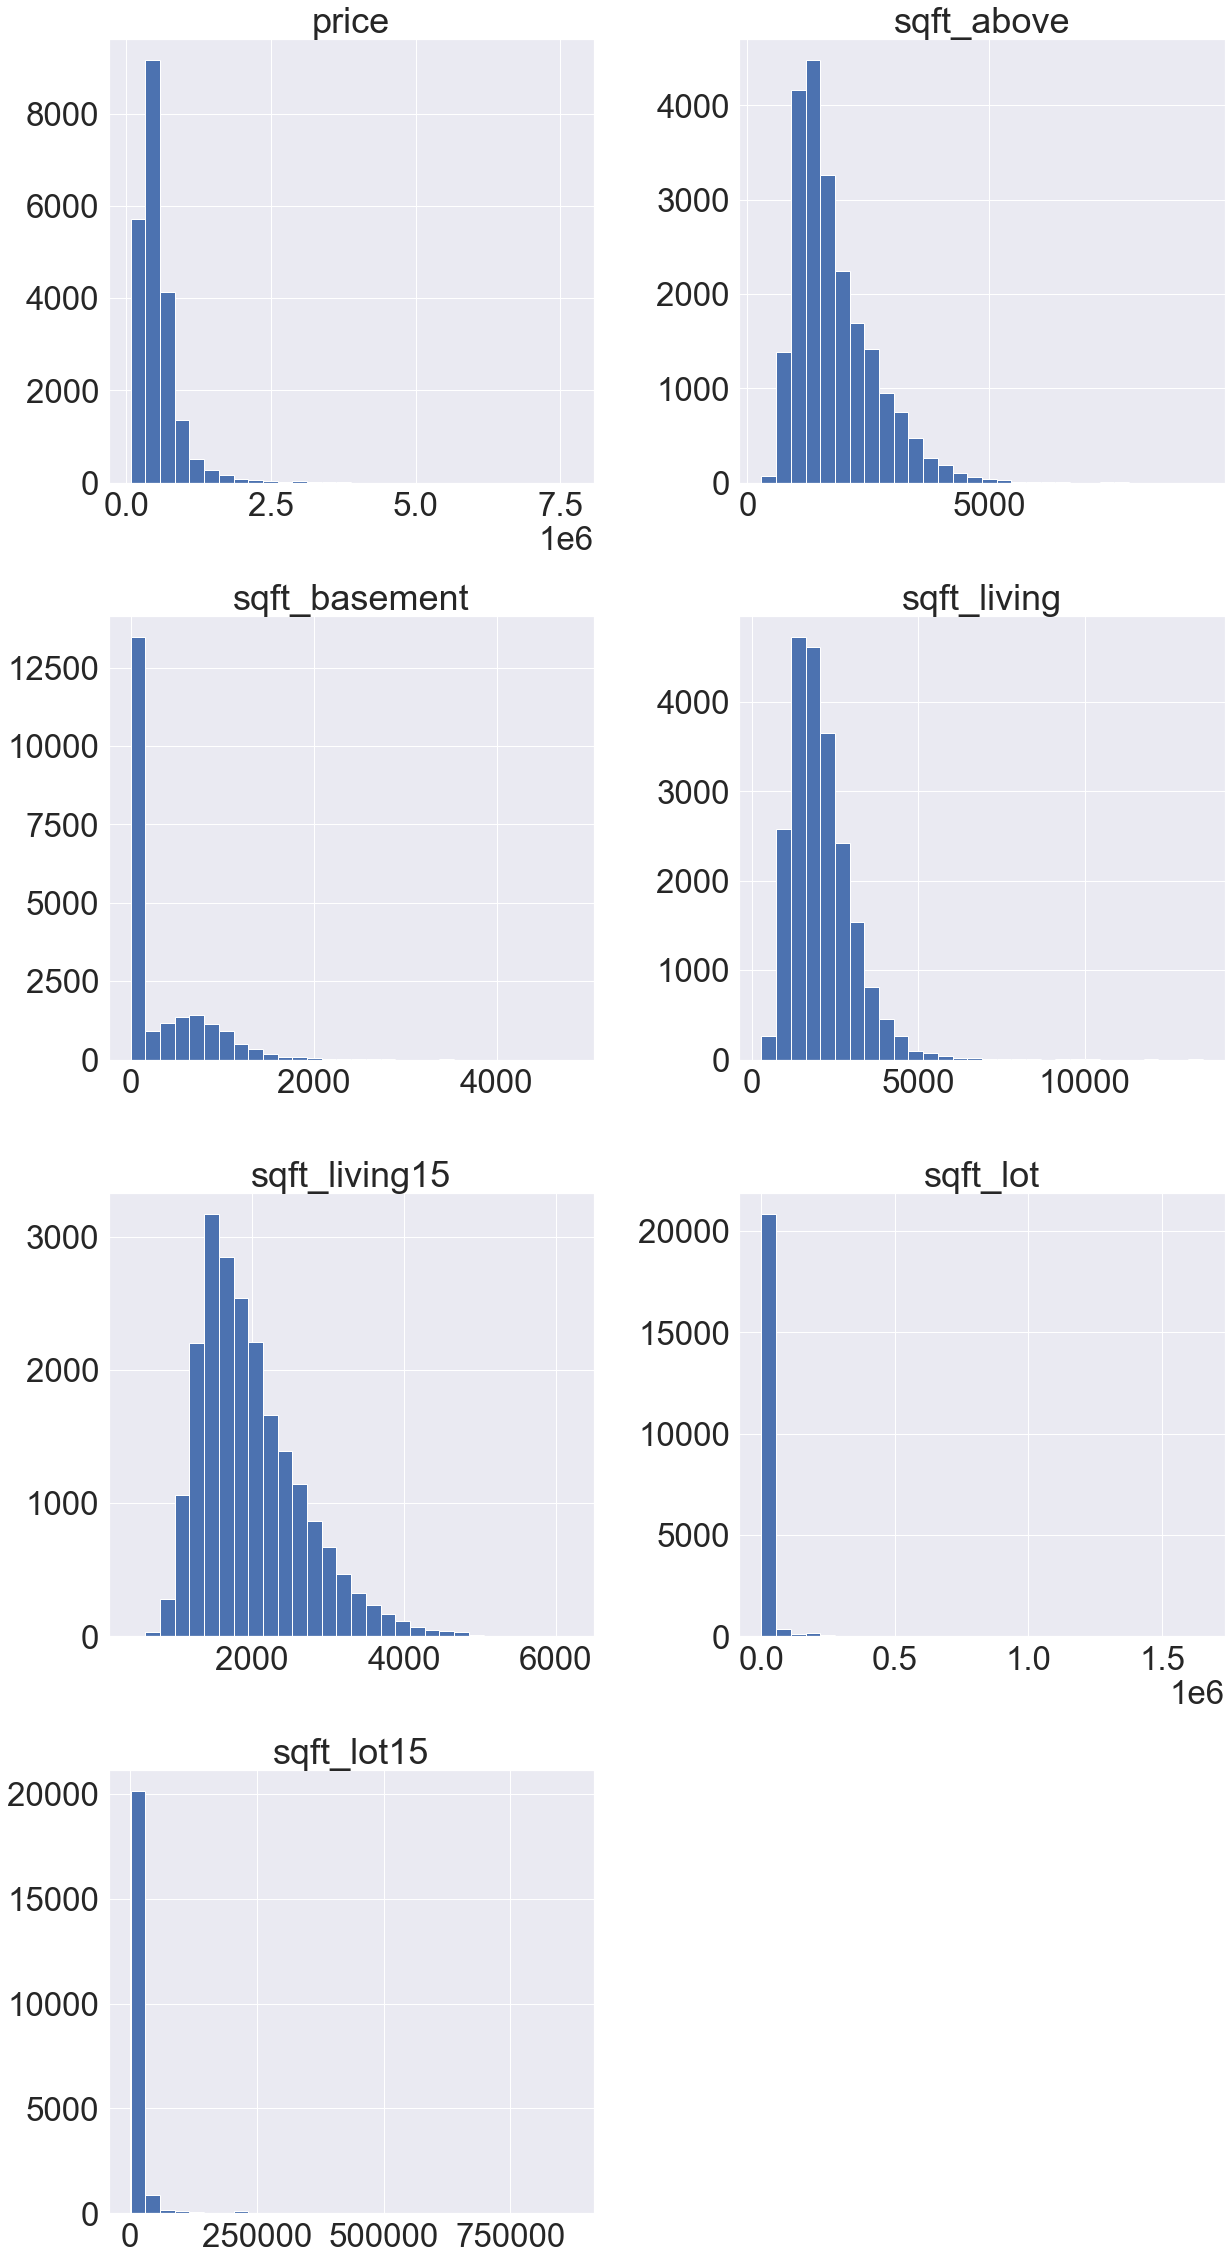

In [22]:
con_feat.hist(figsize=(20,40), layout=(4,2), bins = 30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd9416521d0>],
      dtype=object)

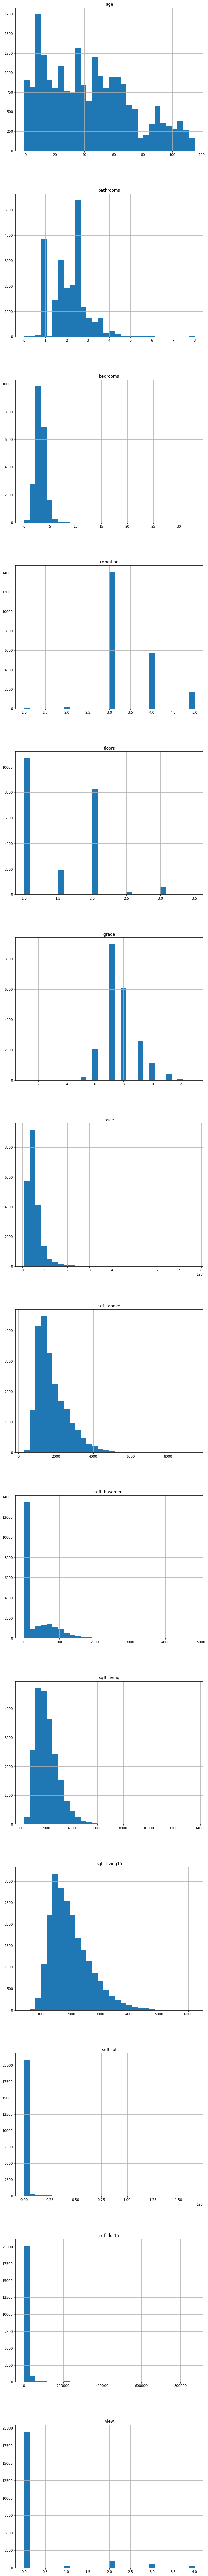

In [6]:
df[num_col].hist(figsize=(10,150), layout = (15,1), bins = 30)

We can see from the above histogram that very few numeric features are normaly distributed. Features such as sqft_lot, bathrooms and price are highly skewed and sqft_basement has a very high number of 0 values. These will become a liability to a linear model as it decrease the reliability.

## Examine correlation among variables 

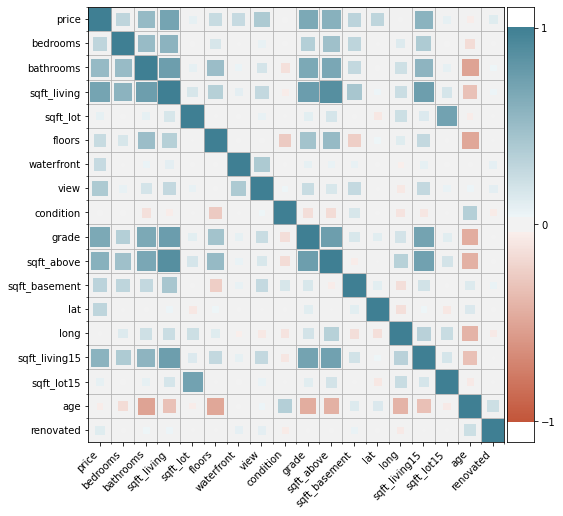

In [8]:
plt.figure(figsize=(8, 8))
corrplot(df.corr())

From this correlation map of the numeric features, we can see that:

- Features relating to sizes seems to influence the prices of the house the most, namely: "bedrooms", "badrooms", "sqft_living", "sqft_lot", "sqft_above", "sqft_living15", "grade". However, we need to keep in mind that these features are also correlated with one another as well.Therefore, some of these features need to be filtered out to avoid multicolinearity.

- Unexpectedly, age has very little to contritute to the price of the residence

In [17]:
#Filter out features
df.drop(['sqft_living15','sqft_lot15','age','sqft_above'],axis = 1, inplace= True)

Examining continuous variable using scatter plot

[Text(0, 0.5, 'price'), Text(0.5, 0, 'sqft_living15')]

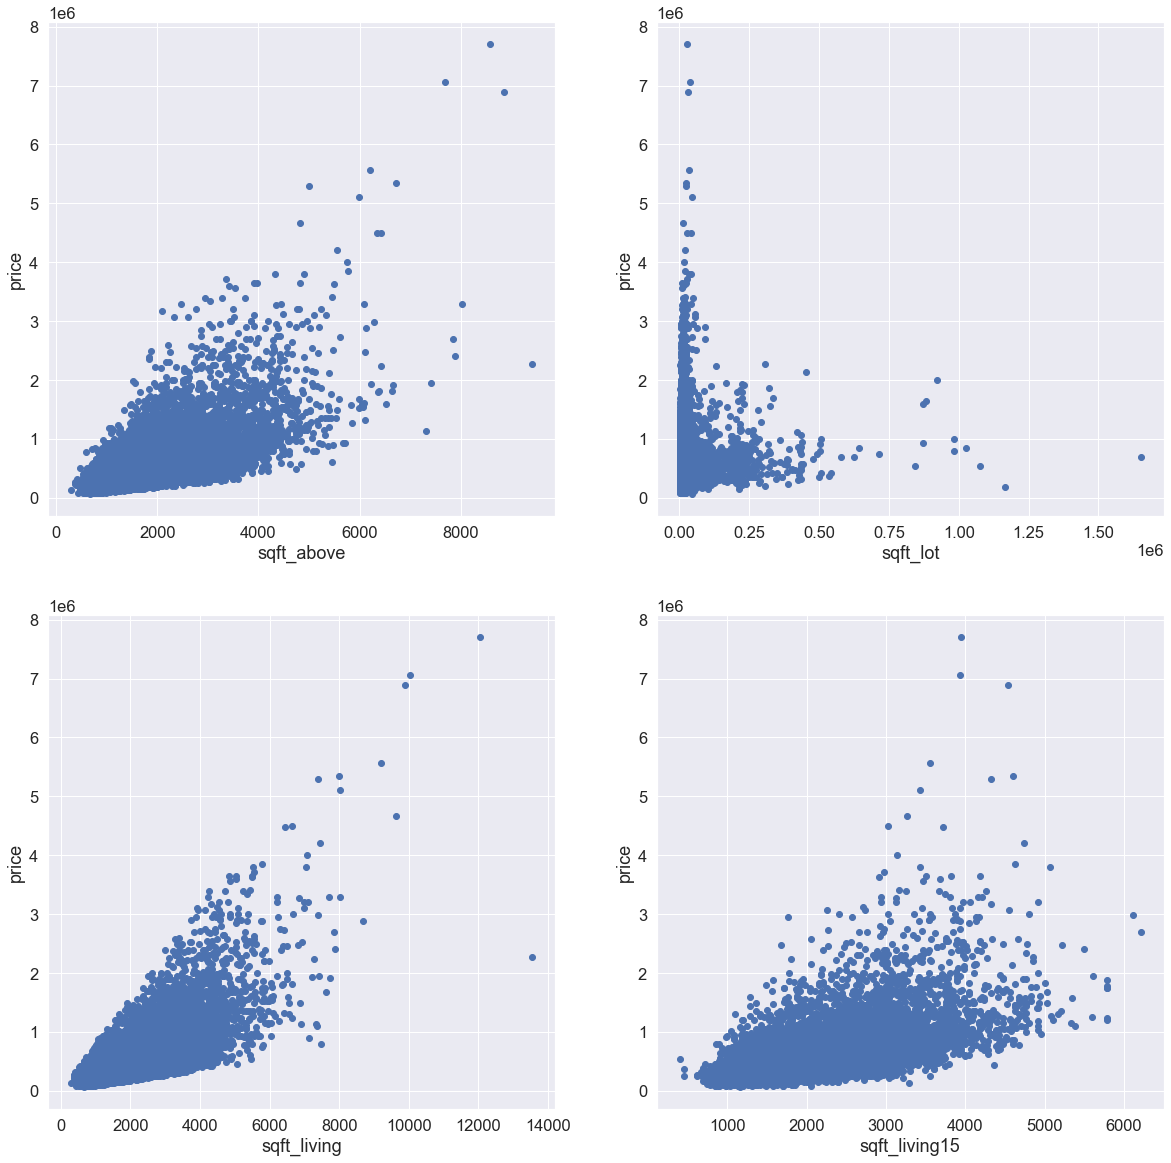

In [54]:
fig, axes = plt.subplots(2,2,figsize = (20,20))

axes[0,0].scatter(df['sqft_above'],df['price'])
axes[0,0].set(xlabel='sqft_above',ylabel='price')

axes[0,1].scatter(df['sqft_lot'],df['price'])
axes[0,1].set(xlabel='sqft_lot',ylabel='price')

axes[1,0].scatter(df['sqft_living'],df['price'])
axes[1,0].set(xlabel='sqft_living',ylabel='price')

axes[1,1].scatter(df['sqft_living15'],df['price'])
axes[1,1].set(xlabel='sqft_living15',ylabel='price')

## Further explore the relation ship between size features and price

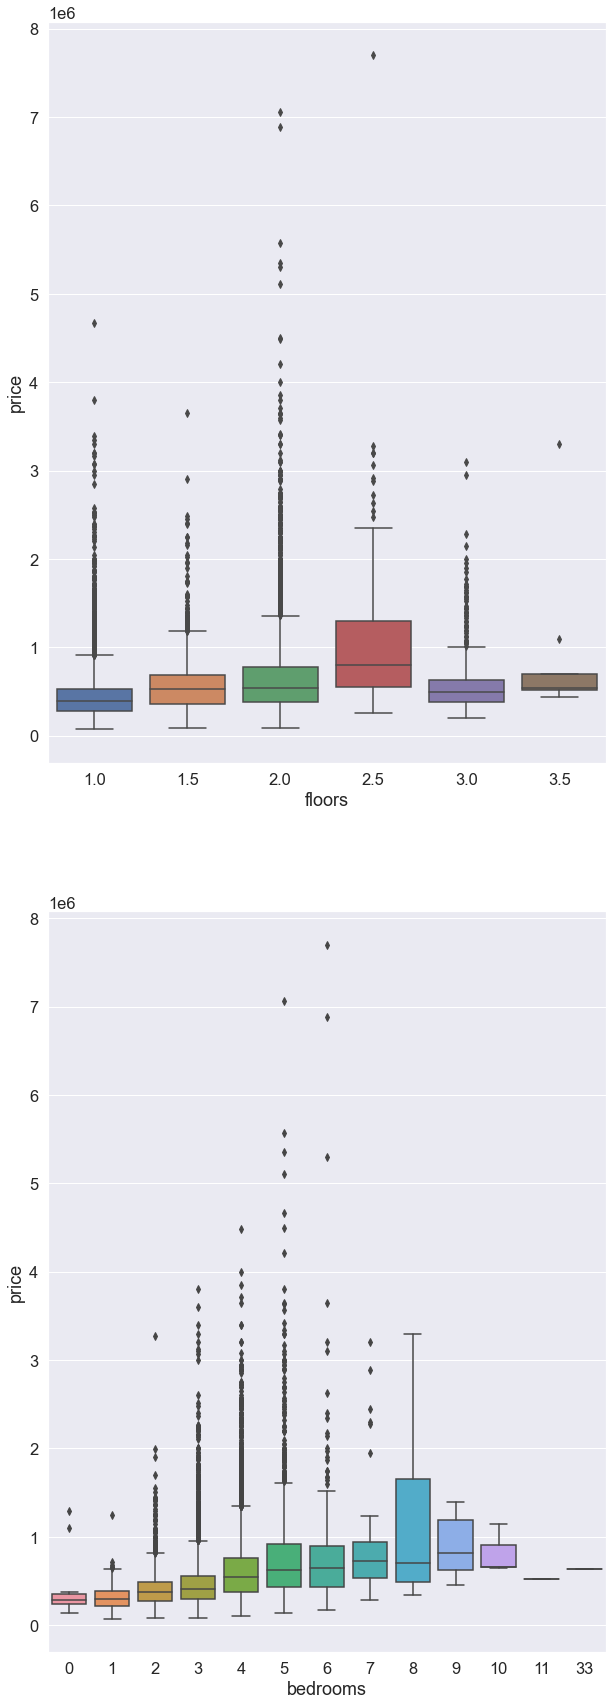

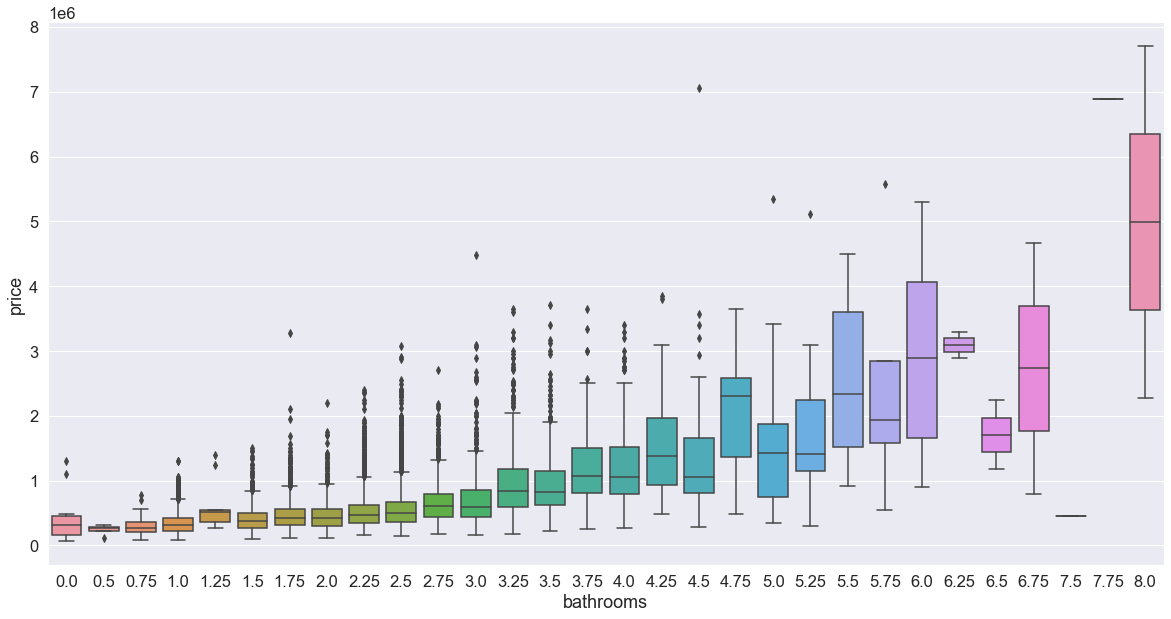

In [78]:
fig, axes = plt.subplots(2,1,figsize = (10,30))
sns.set(font_scale=1.5)
sns.boxplot(x='floors', y='price',data = df,ax=axes[0])
sns.boxplot(x='bedrooms', y='price',data = df, ax=axes[1])

fig, ax = plt.subplots(1,1, figsize = (20,10))
sns.boxplot(x='bathrooms', y='price',data = df, ax=ax)

## Visualizing price by categorical variables 

Seeing how price differs in each variable grouping using viloin plot

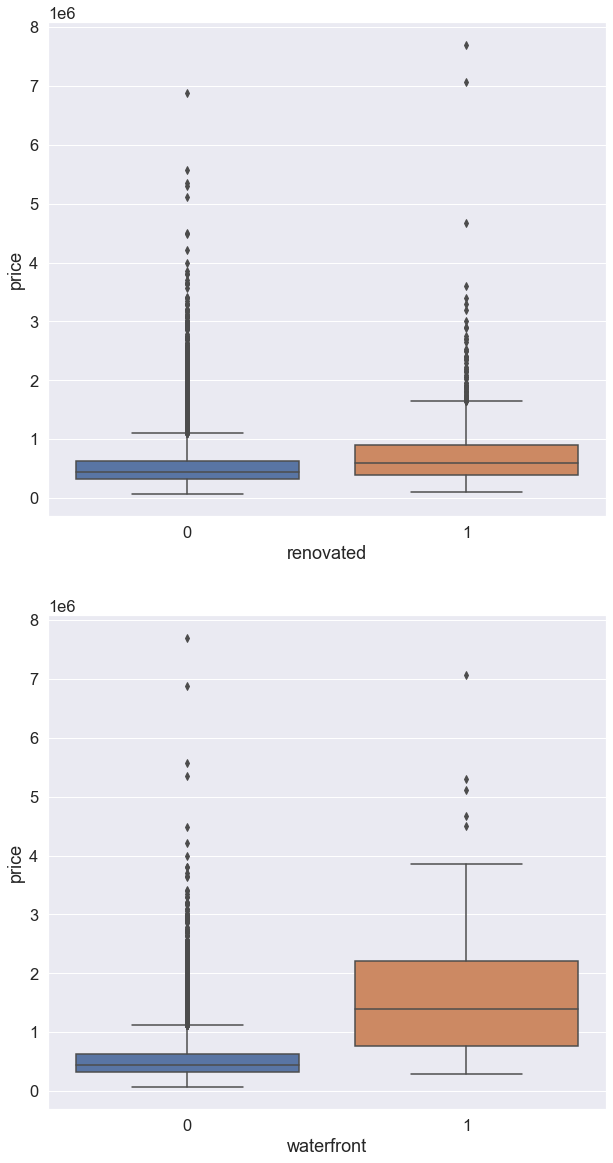

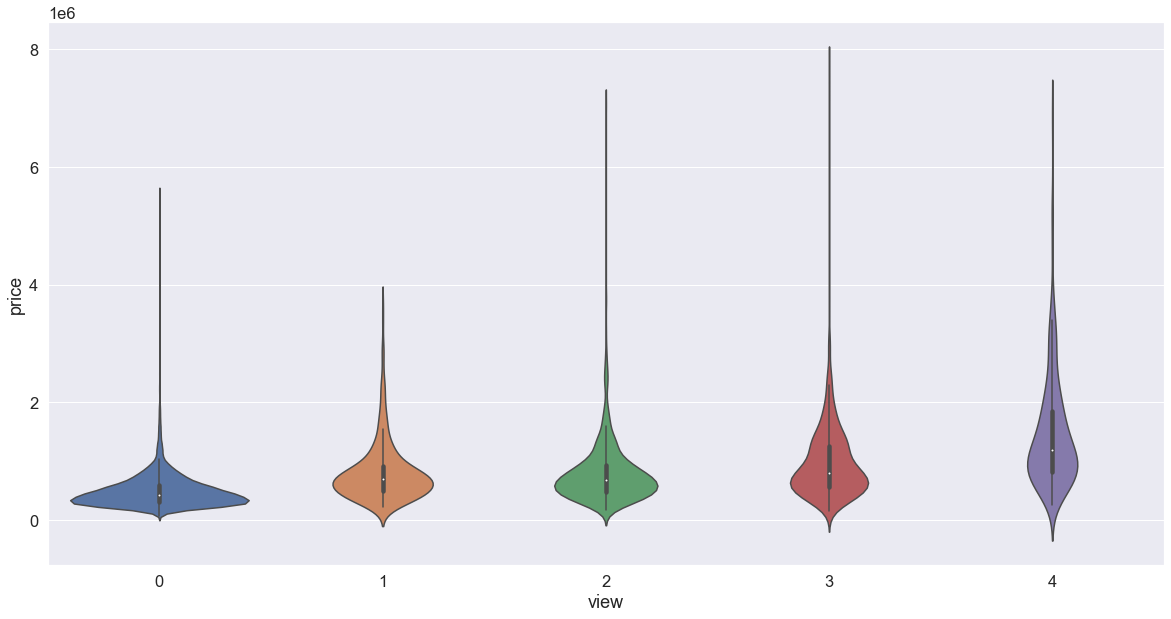

In [11]:
fig, axes = plt.subplots(2,1,figsize=(10,20))
sns.set(font_scale=1.5)
sns.boxplot(x=df['renovated'],y=df['price'],ax=axes[0])
sns.boxplot(x=df['waterfront'],y=df['price'],ax=axes[1])

fig, ax = plt.subplots(1,1,figsize=(20,10))
sns.violinplot(x=df['view'],y=df['price'],ax=ax)

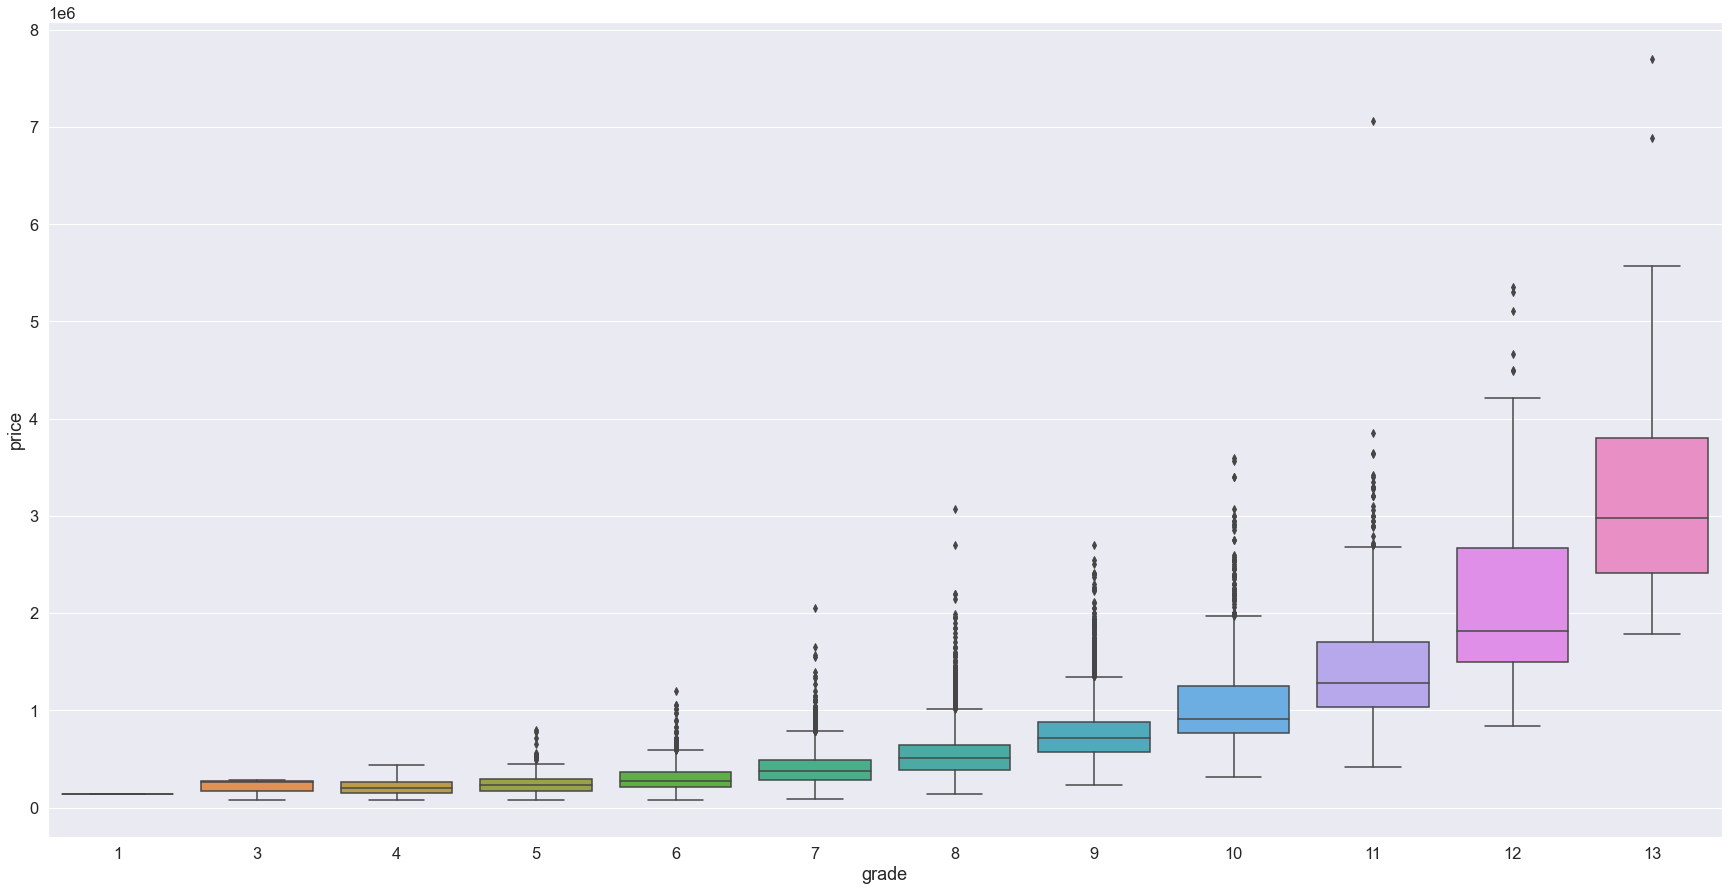

In [14]:
plt.figure(figsize=(30,15))
sns.boxplot(x=df['grade'], y=df['price'])
sns.set(font_scale=3)

Each of these features has a visible effect on price. View seems to be the features where the effect on price is less distinctiive

## Visualizing price by location

Intuitively, it makes sense that the location of the house largely influence the price as well, let's visualize the distribution of house prices on map using longtitude and latitude as metrics

In [18]:
maxpr=df.loc[df['price'].idxmax()]

# define a function to draw a basemap easily
def generateBaseMap(default_location=[47.5112, -122.257], default_zoom_start=9.4):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

df_copy = df.copy()
# select a zipcode for the heatmap
#set(df['zipcode'])
#df_copy = df[df['zipcode']==98001].copy()
df_copy['count'] = 1
basemap = generateBaseMap()
# add carton position map
folium.TileLayer('cartodbpositron').add_to(basemap)
s=folium.FeatureGroup(name='icon').add_to(basemap)
# add a marker for the house which has the highest price
folium.Marker([maxpr['lat'], maxpr['long']],popup='Highest Price: $'+str(format(maxpr['price'],'.0f')),
              icon=folium.Icon(color='green')).add_to(s)
# add heatmap
HeatMap(data=df_copy[['lat','long','count']].groupby(['lat','long']).sum().reset_index().values.tolist(),
        radius=8,max_zoom=13,name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed=False).add_to(basemap)
basemap